# Preprocessing showoff

In [9]:
import pandas as pd
import yfinance as yf
import numpy as np


import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn-v0_8')
# plt.style.use('seaborn-colorblind') #alternative
# plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

Keep using AAPL data

## Load Data

In [10]:
df = pd.read_csv("/Users/leonardoplacidi/Desktop/BacktestingTrade/Python4Finance/data/AAPL_data_adj_rtn.csv", index_col= 'Date')

df.head()

,adj_close,simple_rtn,log_rtn
Date,,,
2000-01-03,0.844981,NaN,NaN
2000-01-04,0.773741,-0.084310,-0.088077
2000-01-05,0.785063,0.014633,0.014527
2000-01-06,0.717125,-0.086538,-0.090514
2000-01-07,0.751094,0.047369,0.046281


## Find Outliers with Respect to Simple Return

The **simple return** on a stock is a measure that indicates how much the value of the investment has increased or decreased over a period relative to the initial investment. It is calculated using the following formula:

$$ \text{Simple Return} = \frac{P_{\text{end}} - P_{\text{start}}}{P_{\text{start}}} $$

Where:
- $P_{\text{start}}$ is the price of the stock at the beginning of the period.
- $P_{\text{end}}$ is the price of the stock at the end of the period.

Simple returns are useful for identifying performance trends and potential outliers in stock data, providing insights into periods of exceptional gains or losses.

In [11]:
#compute a mean and std over 21 elemenets for the simple_rtn and add it to the dataset
#THIS IS A MOVING AVERAGE!
df_rolling = df[['simple_rtn']].rolling(window=21).agg(['mean', 'std']) 

df_rolling.columns = df_rolling.columns.droplevel()

df_outliers = df.join(df_rolling)

In [19]:
#this must have nans since the first 21 elements cannot be in the moving average
df_rolling.head(25)

,mean,std
Date,,
2000-01-03,NaN,NaN
2000-01-04,NaN,NaN
2000-01-05,NaN,NaN
2000-01-06,NaN,NaN
2000-01-07,NaN,NaN
2000-01-10,NaN,NaN
2000-01-11,NaN,NaN
2000-01-12,NaN,NaN
2000-01-13,NaN,NaN


In [12]:
def indentify_outliers(row, n_sigmas=3):
    x = row['simple_rtn']
    mu = row['mean']
    sigma = row['std']

    if (x > mu + 3 * sigma) | (x < mu - 3 * sigma):
        return 1 
    else:

        return 0

In [13]:
df_outliers["outliers"] = df_outliers.apply(indentify_outliers, axis = 1)

outliers = df_outliers.loc[df_outliers["outliers"] == 1, ["simple_rtn"]]

Attention to the ghost effect as the outliers enter the moving averages and std!

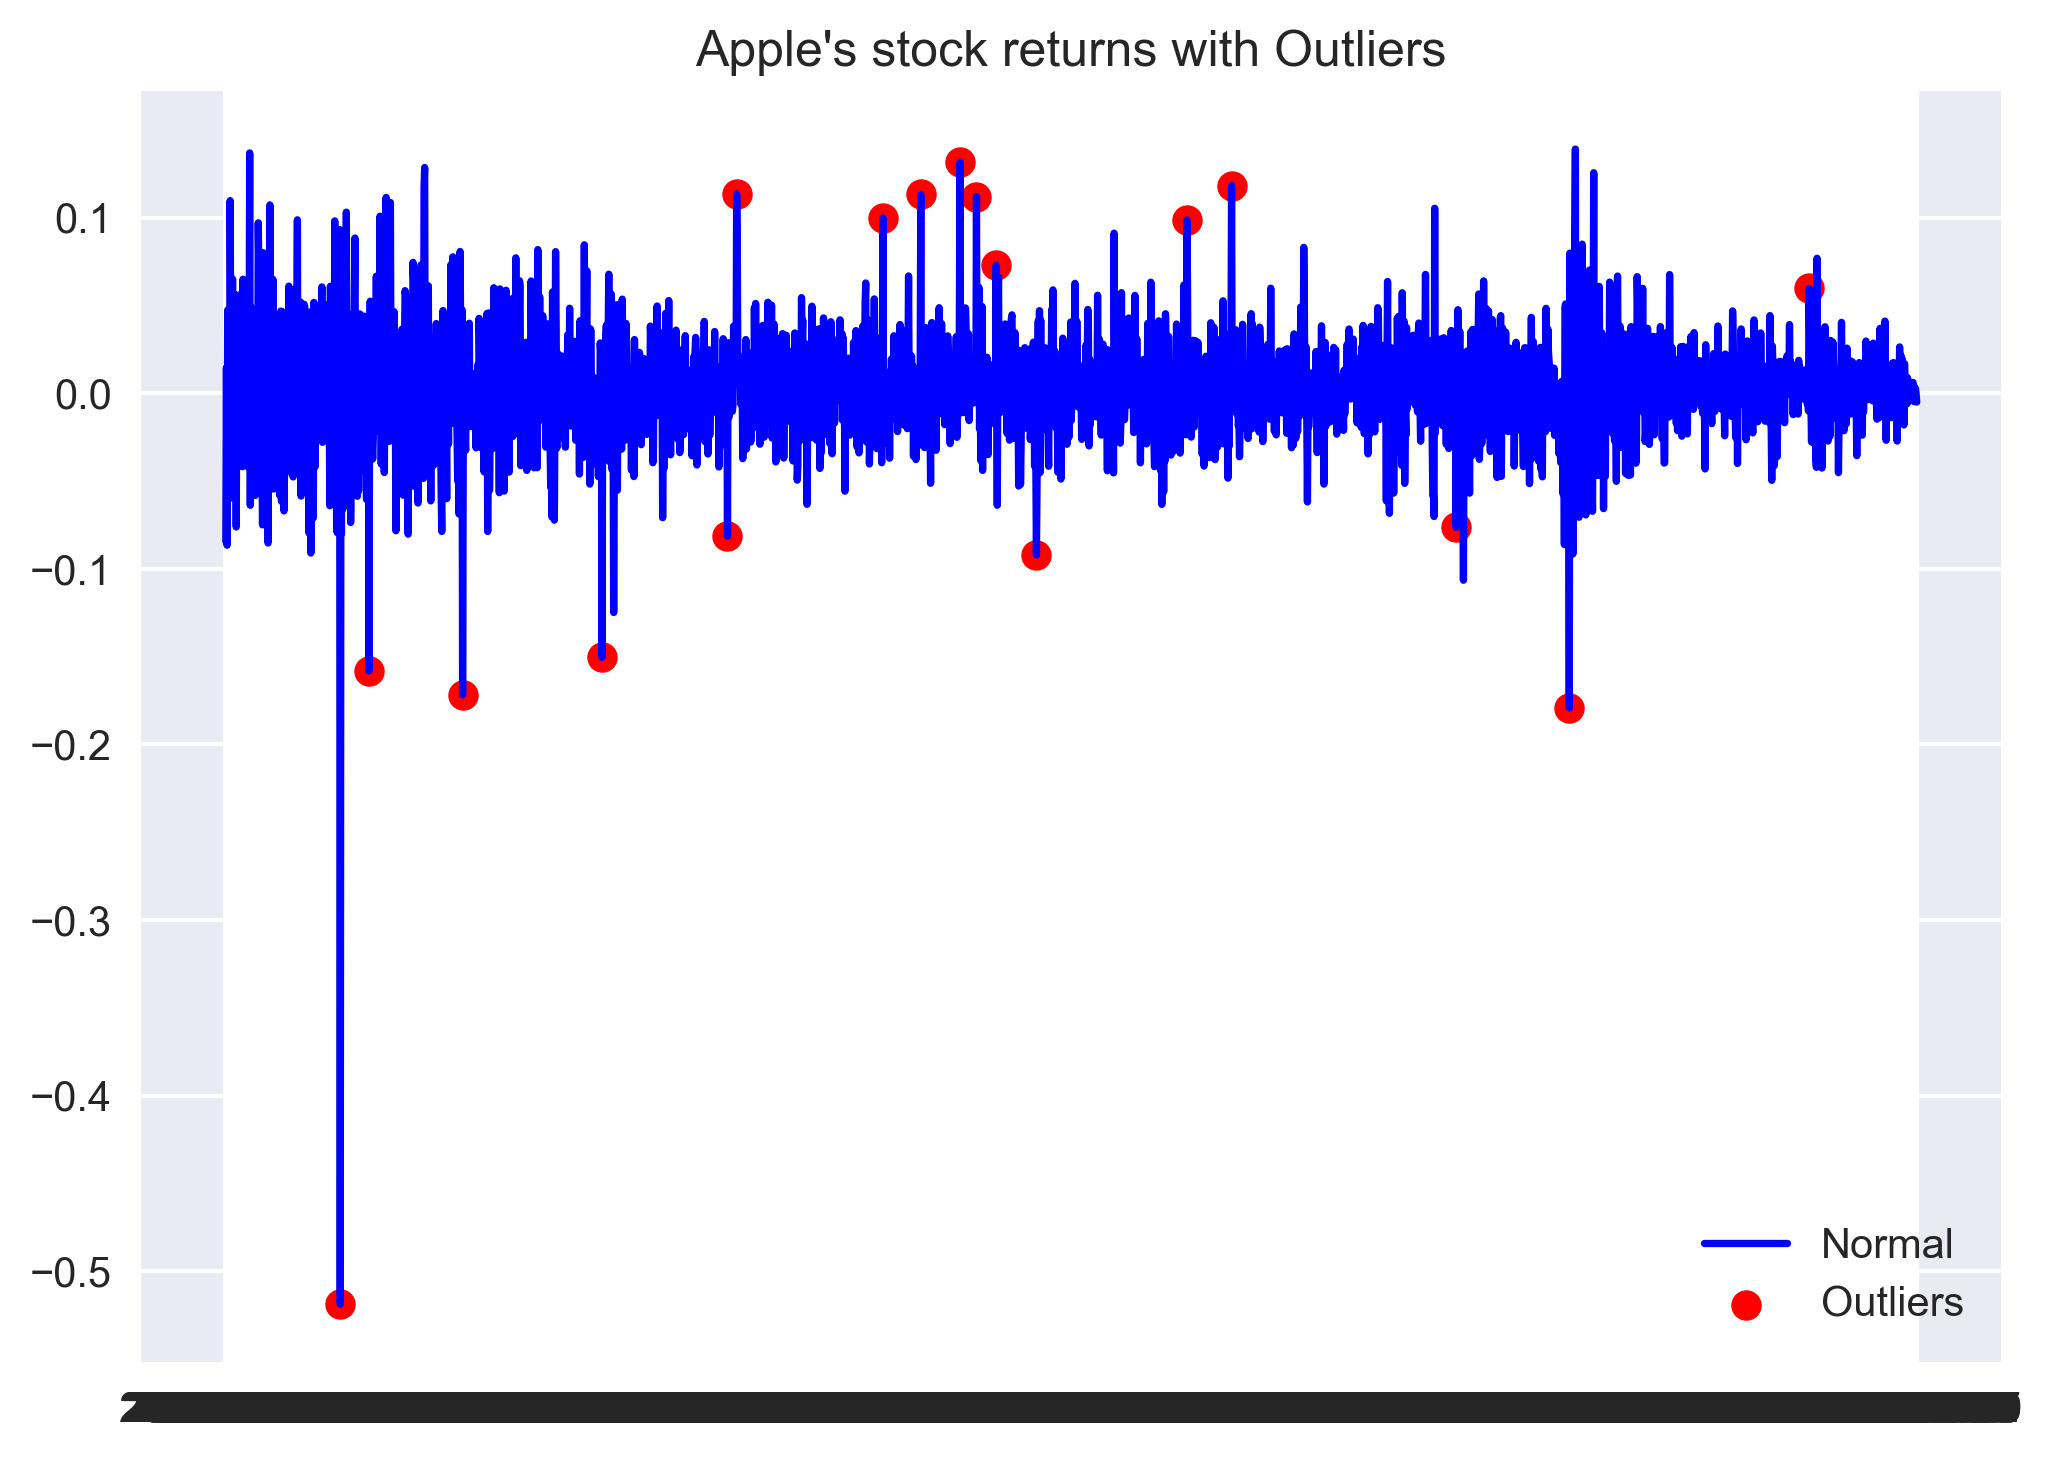

In [15]:
fix, ax = plt.subplots()

ax.plot(df_outliers.index, df_outliers.simple_rtn, color = "blue", label = "Normal")
ax.scatter(outliers.index, outliers.simple_rtn, color = "red", label = "Outliers")

ax.set_title("Apple's stock returns with Outliers") 
ax.legend(loc='lower right')

## Stylized facts

I wanna use another dataset, so like they do in the book I am going to use S&P500 (NOT A STOCK anymore!)

### Fast prepare S&P500 data

In [23]:
import pandas as pd
import yfinance as yf

df_SP500 = yf.download("^GSPC", start = "2014-01-01", end = "2023-12-31", progress = True, actions = "inline")
df_SP500.rename(columns={'Adj Close':'adj_close'}, inplace=True)
df_SP500.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,adj_close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,3080600000,0.0,0.0
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,2774270000,0.0,0.0
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,3294850000,0.0,0.0
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,3511750000,0.0,0.0
2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,1837.489990,3652140000,0.0,0.0


I wanna work the simple returns from the adj close so it's better since it accounts for dividends

In [26]:
df_SP500['simple_rtn'] = df_SP500.adj_close.pct_change()
df_SP500['log_rtn'] = np.log(df_SP500.adj_close/df_SP500.adj_close.shift(1))

df_SP500.head()

,Open,High,Low,Close,adj_close,Volume,Dividends,Stock Splits,simple_rtn,log_rtn
Date,,,,,,,,,,
2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,3080600000,0.0,0.0,NaN,NaN
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,2774270000,0.0,0.0,-0.000333,-0.000333
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,3294850000,0.0,0.0,-0.002512,-0.002515
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,3511750000,0.0,0.0,0.006082,0.006063
2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,1837.489990,3652140000,0.0,0.0,-0.000212,-0.000212


In [28]:
df_SP500.to_csv('/Users/leonardoplacidi/Desktop/BacktestingTrade/Python4Finance/data/SP500_plus_returns.csv', index=True)